In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import random
import time
%matplotlib inline
# matplotlib.style.use('seaborn')

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn import manifold
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy
from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import pairwise_distances
from wordcloud import WordCloud

clrs_7=matplotlib.colors.LinearSegmentedColormap.from_list("", ['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','#a65628'])#'#d9d9d9',

In [2]:
start_exec=time.time()

In [3]:
#dat=pd.read_csv("profiles.csv")
dat=pd.read_csv("Connections.csv")
print(dat.columns)
dat["Connected On"]=pd.to_datetime(dat["Connected On"])

Index(['First Name', 'Last Name', 'Email Address', 'Company', 'Position',
       'Connected On'],
      dtype='object')


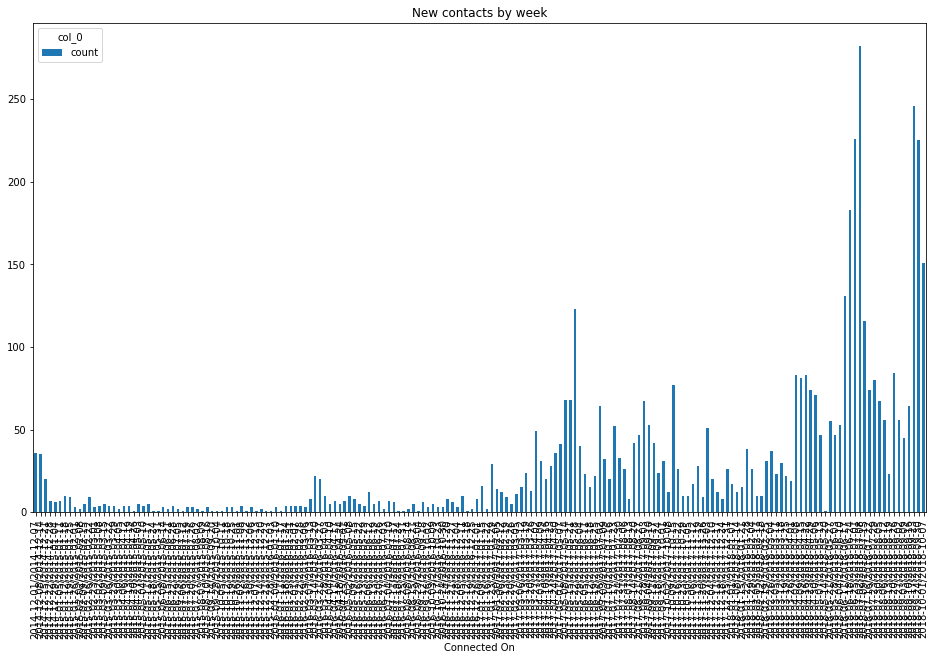

In [4]:
contact_date = pd.crosstab(index=dat["Connected On"].dt.to_period('w'),
                           columns="count")
contact_date.plot(kind="bar",figsize=(16,9), title="New contacts by week")#, cmap=clrs_7)

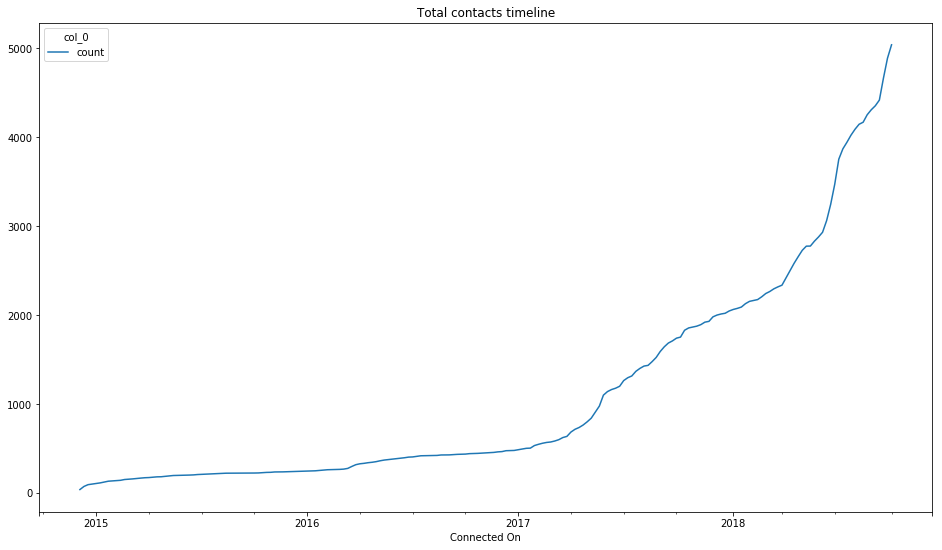

In [5]:
contact_date.cumsum().plot(figsize=(16,9),title="Total contacts timeline")#,cmap=clrs_7)

# Text Clustering contacts

In [6]:
dat["Description"]=dat["Company"]+" "+dat["Position"]

In [7]:
### Non Company Description Accounts
print("Proportion of Non Company Description Accounts: ", sum(pd.isna(dat["Description"]))/len(pd.isna(dat["Description"])))
data=dat.dropna(subset=["Description"])#(how='any')
print("Filtered Contacts", len(pd.isna(data["Description"])))
#dat.iloc(pd.isna(dat["Description"]))
data.shape

Proportion of Non Company Description Accounts:  0.04604088112720778
Filtered Contacts 4807


(4807, 7)

In [8]:
stp_wrds=['de','en','del','la','las','sas','inc','in','of','the','el','los','ltda','com','ltd','and','llc',
     'para','san','sa','co','con','for','it','esp','eps','corp','at','av','sm','cia']

In [9]:
count_vect = CountVectorizer(stop_words=stp_wrds)#,ngram_range=(1,2))
n_grams_counts = count_vect.fit_transform(data["Description"])#.toarray()
n_grams_counts.shape
#count_vect.get_feature_names()

(4807, 6175)

In [10]:
#np.array([n_grams_counts.toarray().sum(axis=0),count_vect.get_feature_names()])
top_n = 300
txt_freqs= n_grams_counts.toarray().sum(axis=0)
indices = np.argsort(txt_freqs)[::-1]#np.argsort(vectorizer.idf_)[::-1]
features =count_vect.get_feature_names()# vectorizer.get_feature_names()
# top_features = [features[i] for i in indices[:top_n]]#[[features[i],txt_freqs[i]] for i in indices[:top_n]]
top_features = [[features[i],txt_freqs[i]] for i in indices[:top_n]]
print (top_features[:20])

[['data', 509], ['analista', 363], ['colombia', 317], ['scientist', 292], ['universidad', 252], ['senior', 248], ['director', 227], ['gerente', 222], ['manager', 198], ['engineer', 188], ['business', 148], ['profesional', 142], ['analytics', 142], ['analyst', 139], ['consultant', 138], ['learning', 135], ['selección', 134], ['nacional', 129], ['talento', 121], ['humano', 121]]


In [11]:
esp_words=[ 'universidad', 'nacional', 'banco', 'grupo', 'universitaria', 'fundación', 'seguros',
 'independiente', 'salud', 'corporación', 'centro', 'instituto', 'servicios', 'colegio',
 'consultores', 'pontificia', 'oficial', 'distrital', 'andina', 'educación', 'secretaria',
 'agencia', 'colombiana', 'católica', 'escuela', 'departamento',
 'humano', 'secretaría', 'soluciones', 'estadística',
 'organización', 'clínica', 'ministerio', 'seguridad', 'desarrollo', 'empresarial', 'fundacion', 'fundación',
 'integral', 'internacional', 'administrativo', 'casa', 'editorial', 'minuto',
 'talento', 'valle', 'universidade', 'consultoría', 'ingeniería', 'santo', 'gimnasio',
 'comercializadora', 'colombiano', 'servicio',
 'ejercito', 'investigación', 'tiempo', 'vida', 'alcaldia', 'fondo', 'bienestar',
 'inversiones', 'caja', 'consultoria', 'rosario', 'occidente', 'financiera', 'alianza', 'clinica',
 'asociados', 'nivel', 'bosque', 'corredores', 'tecnología',
 'psicología', 'generales', 'hogar', 'estudios', 'comercial',
 'compañía', 'latinoamericana', 'particular', 'empleo', 'comercio', 'professional',
 'digital', 'alcaldía', 'unidad', 'ventas', 'financieros', 'empresa', 'gestión', 'industria',
 'industriales', 'empresariales', 'pedagógica', 'república', 'norte', 'consultora',
 'mercantil', 'asociación', 'comunicaciones', 'asesorías',
 'consultor', 'terciarios', 'área', 'integración', 'artificial', 'cooperativa',
 'transportes','freelance','freelancer','consultant',
          'analista','análisis','gerente','profesional','selección','seleccion','humanos',
          'psicólogo','psicóloga','psicologo','psicologa','directora',
          'estadístico','estadística','estadistico','analyst']

eng_words=['university', 'national', 'bank', 'group', 'university', 'foundation', 'insurance',
 'independent', 'health', 'corporation', 'center', 'institute', 'services', 'school',
 'consultancy', 'pontifical', 'official', 'district', 'andean', 'education', 'secretary',
 'agency', 'colombian', 'catholic', 'school', 'department',
 'human', 'secretary', 'solutions', 'statistics',
 'organization', 'clinic', 'ministry', 'security', 'development', 'business', 'foundation', 'foundation',
 'integral', 'international', 'administrative', 'house', 'editorial', 'minute',
 'talent', 'valley', 'university', 'consulting', 'engineering', 'saint', 'gym',
 'sales', 'colombian', 'servicio',
 'army', 'research', 'time', 'life', 'mayor', 'fund', 'wellness',
 'investments', 'box', 'consultancy', 'rosary', 'occident', 'financial', 'alliance', 'clinic',
 'associates', 'level', 'forest', 'broker', 'technology',
 'psychology', 'generals', 'home', 'studies', 'commercial',
 'company', 'latam', 'private', 'employment', 'commerce', 'professional',
 'digital', 'mayor', 'unit', 'sales', 'financial', 'company', 'management', 'industry',
 'industry', 'business', 'pedagogical', 'republic', 'north', 'consultancy',
 'mercantile', 'association', 'communications', 'consultancy',
 'consultancy', 'tertiary', 'area', 'integration', 'artificial', 'cooperative',
 'transport','consultancy','consultancy','consultancy',
          'analysis','analysis','manager','professional','selection','selection','human',
          'psychology','psychology','psychology','psychology','director',
          'statistics','statistics','statistics','analysis']
len(esp_words)==len(eng_words)

True

In [12]:
print("START lower case and unify most frequent words languaje")
for i in data.Description.index:
    jb_desc=str(data.Description[i]).lower()
    for n_wd in range (len (esp_words)):
        jb_desc = jb_desc.replace(esp_words[n_wd], eng_words[n_wd])
    data.Description[i]=jb_desc
#     print(i)
print("END")

START lower case and unify most frequent words languaje


C:\Users\Alexis\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Alexis\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2961: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


END


In [13]:
# Repeat vectorization after replacement frequent terms
count_vect = CountVectorizer(stop_words=stp_wrds)#,ngram_range=(1,2))
n_grams_counts = count_vect.fit_transform(data["Description"])#.toarray()
n_grams_counts.shape
#count_vect.get_feature_names()

(4807, 6067)

In [14]:
#np.array([n_grams_counts.toarray().sum(axis=0),count_vect.get_feature_names()])
top_n = 300
txt_freqs= n_grams_counts.toarray().sum(axis=0)
indices = np.argsort(txt_freqs)[::-1]#np.argsort(vectorizer.idf_)[::-1]
features =count_vect.get_feature_names()# vectorizer.get_feature_names()
# top_features = [features[i] for i in indices[:top_n]]#[[features[i],txt_freqs[i]] for i in indices[:top_n]]
top_features = [[features[i],txt_freqs[i]] for i in indices[:top_n]]
print (top_features[:25])

[['analysis', 521], ['data', 509], ['consultancy', 445], ['manager', 420], ['university', 387], ['colombia', 317], ['psychology', 309], ['director', 299], ['scientist', 292], ['senior', 248], ['group', 199], ['engineer', 188], ['talent', 187], ['human', 174], ['business', 173], ['selection', 166], ['professional', 161], ['development', 159], ['research', 151], ['management', 149], ['analytics', 142], ['national', 141], ['statistics', 139], ['learning', 135], ['bank', 127]]


Text(0.5,1,'Term frequences sorted')

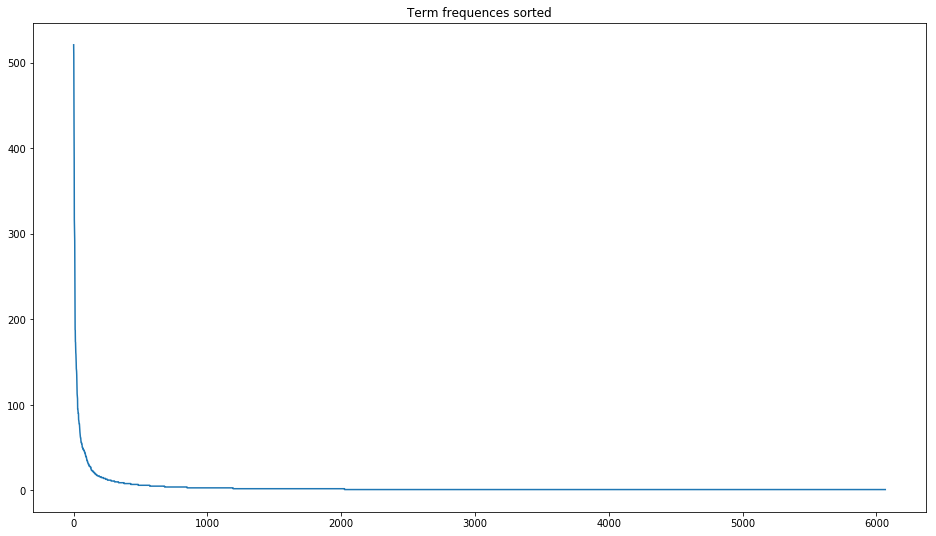

In [15]:
plt.figure(figsize=(16,9))
plt.plot(txt_freqs[indices])
plt.title("Term frequences sorted")
#txt_freqs[indices[:top_n]]

Text(0.5,1,'Terms count by profile')

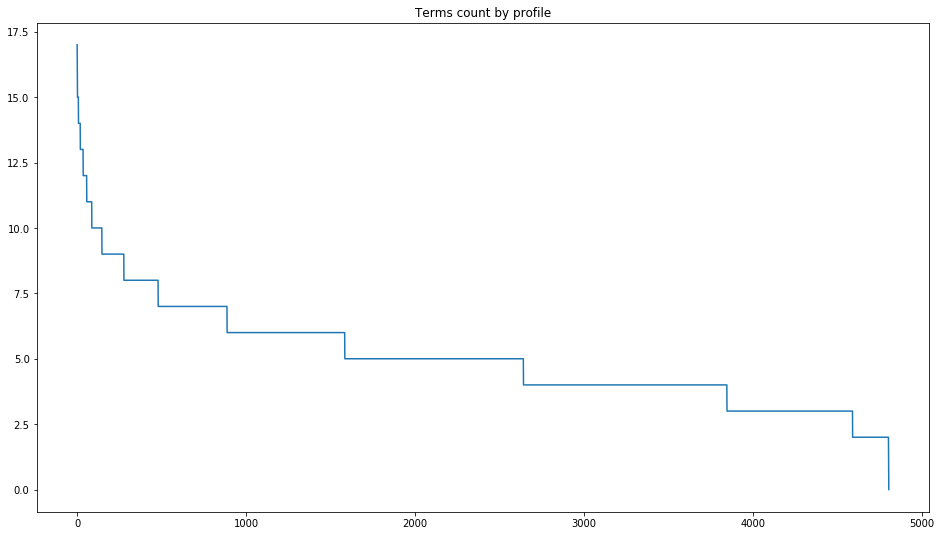

In [16]:
cntc_freqs= n_grams_counts.toarray().sum(axis=1)
cntc_indices = np.argsort(cntc_freqs)[::-1]#np.argsort(vectorizer.idf_)[::-1]
plt.figure(figsize=(16,9))
plt.plot(cntc_freqs[cntc_indices])
plt.title("Terms count by profile")
#txt_freqs[indices[:top_n]]

col_0  count
row_0       
0          1
1          1
2        213
3        744
4       1205
5       1058
6        697
7        408
8        203
9        130
10        60
11        30
12        21
13        17
14        11
15         6
16         1
17         1


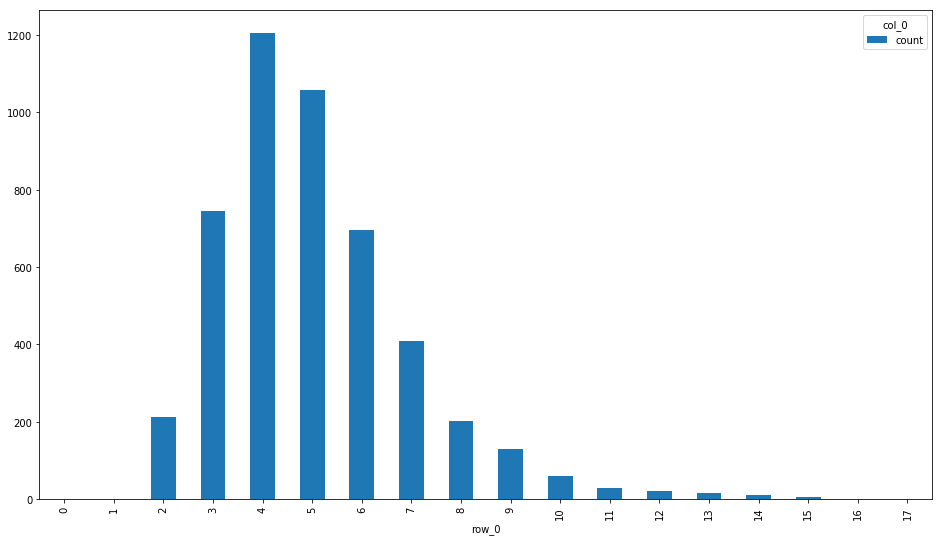

In [17]:
print(pd.crosstab(index=cntc_freqs, columns="count"))
pd.crosstab(index=cntc_freqs, columns="count").plot(kind="bar",figsize=(16,9))#/3409
#(cntc_freqs)

In [18]:
n_grams_count_300=n_grams_counts.toarray()[:,indices[:top_n]]

In [19]:
tfidf_transformer = TfidfVectorizer(stop_words=stp_wrds)
n_grams_tfidf = tfidf_transformer.fit_transform(data["Description"])
n_grams_tfidf.shape

(4807, 6067)

Text(0.5,1.05,'Term-frequence matrix')

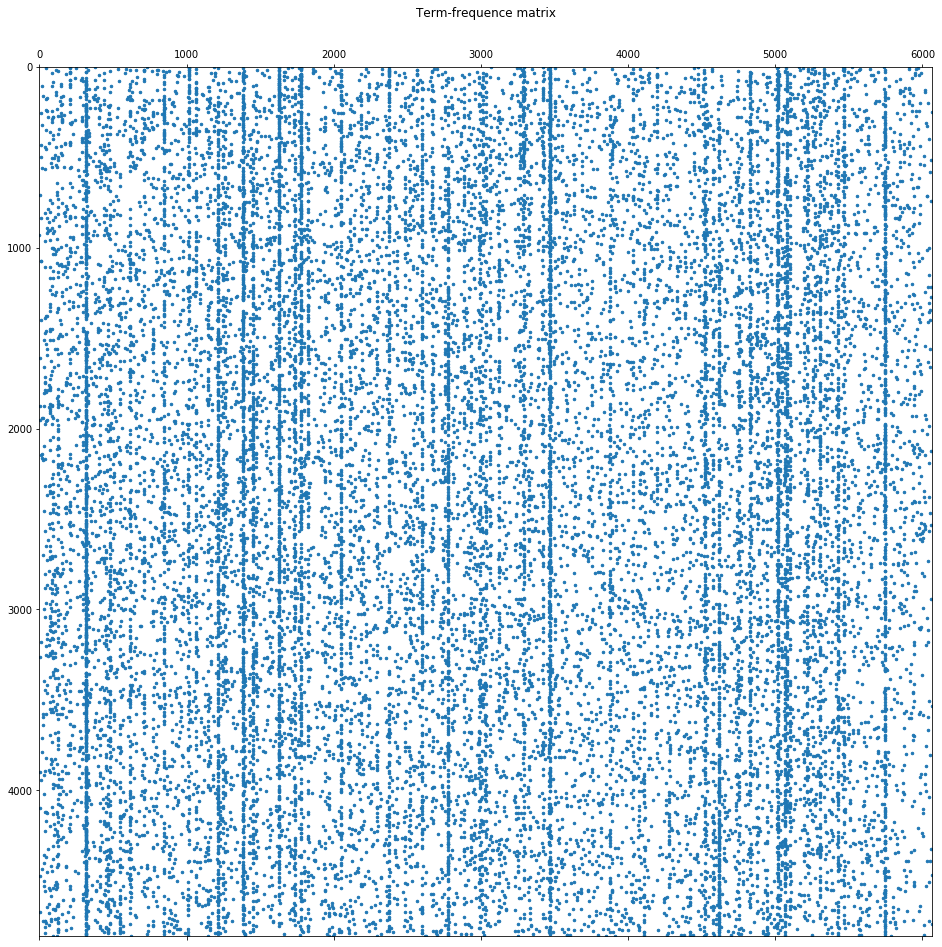

In [20]:
plt.figure(figsize=(16,16))
plt.spy(n_grams_counts,markersize=2.5, marker="o",aspect='auto')
plt.title("Term-frequence matrix")

Text(0.5,1.05,'tf-idf matrix')

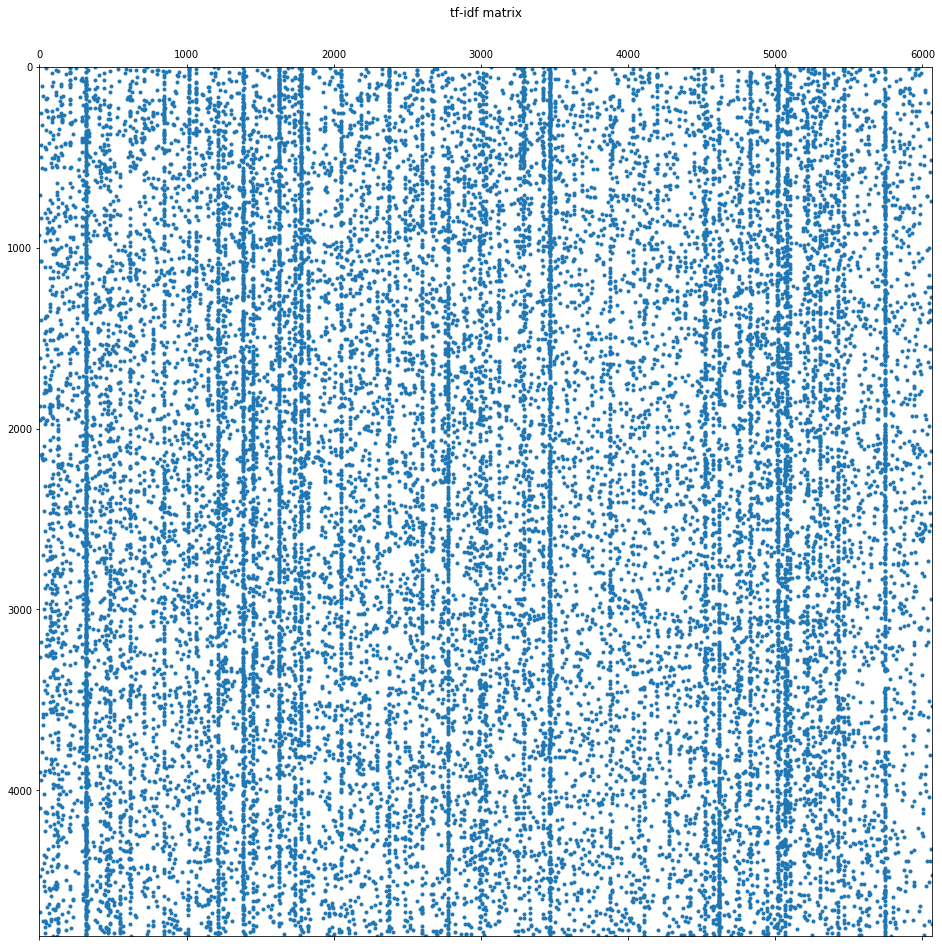

In [21]:
plt.figure(figsize=(16,16))
plt.spy(n_grams_tfidf,markersize=3,aspect='auto', marker="o")
plt.title("tf-idf matrix")

C:\Users\Alexis\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2400: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\Alexis\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2401: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


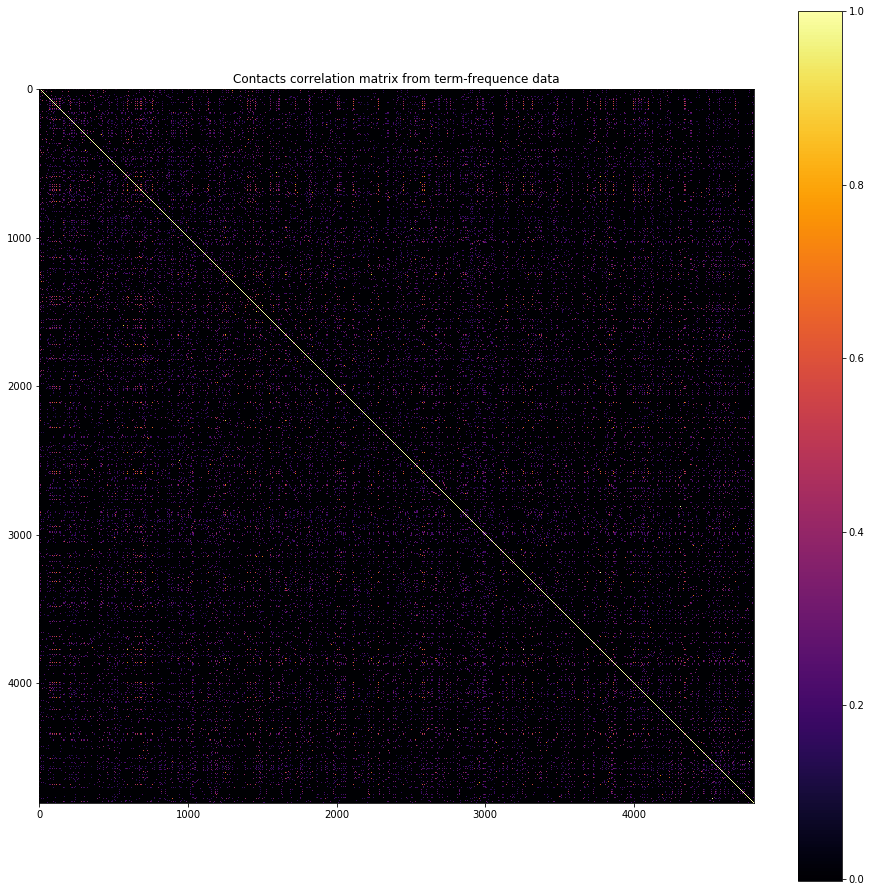

In [22]:
plt.figure(figsize=(16,16))
plt.imshow(np.corrcoef(n_grams_counts.toarray()), cmap=plt.cm.inferno, interpolation='nearest')
plt.title("Contacts correlation matrix from term-frequence data")
plt.colorbar()
plt.show()

Text(0.5,1.05,'Top 300 frequency term frequency matrix')

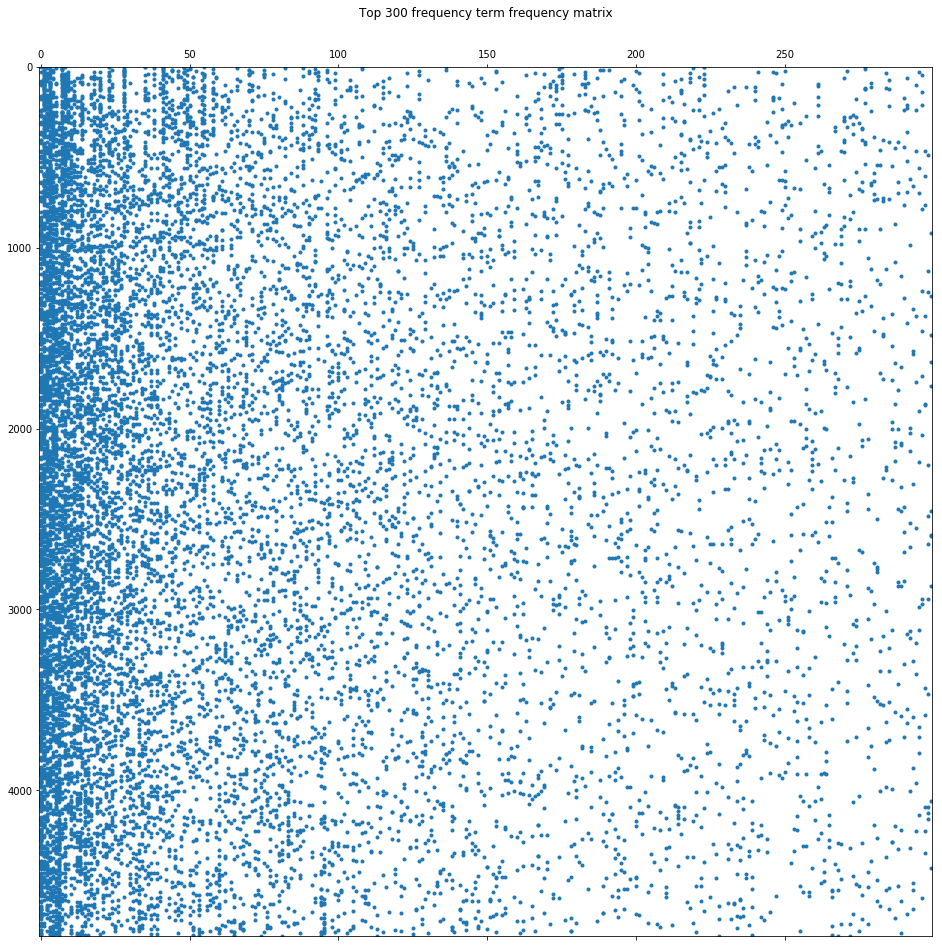

In [23]:
plt.figure(figsize=(16,16))
plt.spy(n_grams_count_300,markersize=3,aspect='auto', marker="o")
plt.title("Top 300 frequency term frequency matrix")

177

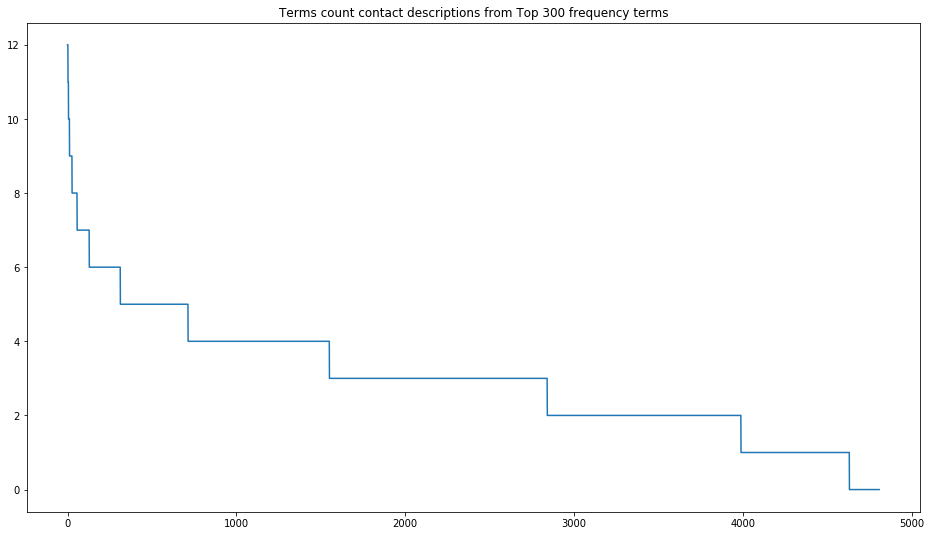

In [24]:
cntc_freqs_300=n_grams_count_300.sum(axis=1)
cntc_indices_300 = np.argsort(cntc_freqs_300)[::-1]#np.argsort(vectorizer.idf_)[::-1]
plt.figure(figsize=(16,9))
plt.plot(cntc_freqs_300[cntc_indices_300])
plt.title("Terms count contact descriptions from Top 300 frequency terms")
sum(cntc_freqs_300<1)

In [25]:
# 2d Embedding for visualization
spect_emb_tfidf=manifold.SpectralEmbedding(n_components=2).fit_transform(n_grams_tfidf.toarray())

## 12 dimentions spectral embedding Ward and DB-scan culstering

In [26]:
spect_emb_tfidf_12d=manifold.SpectralEmbedding(n_components=12).fit_transform(n_grams_tfidf.toarray())

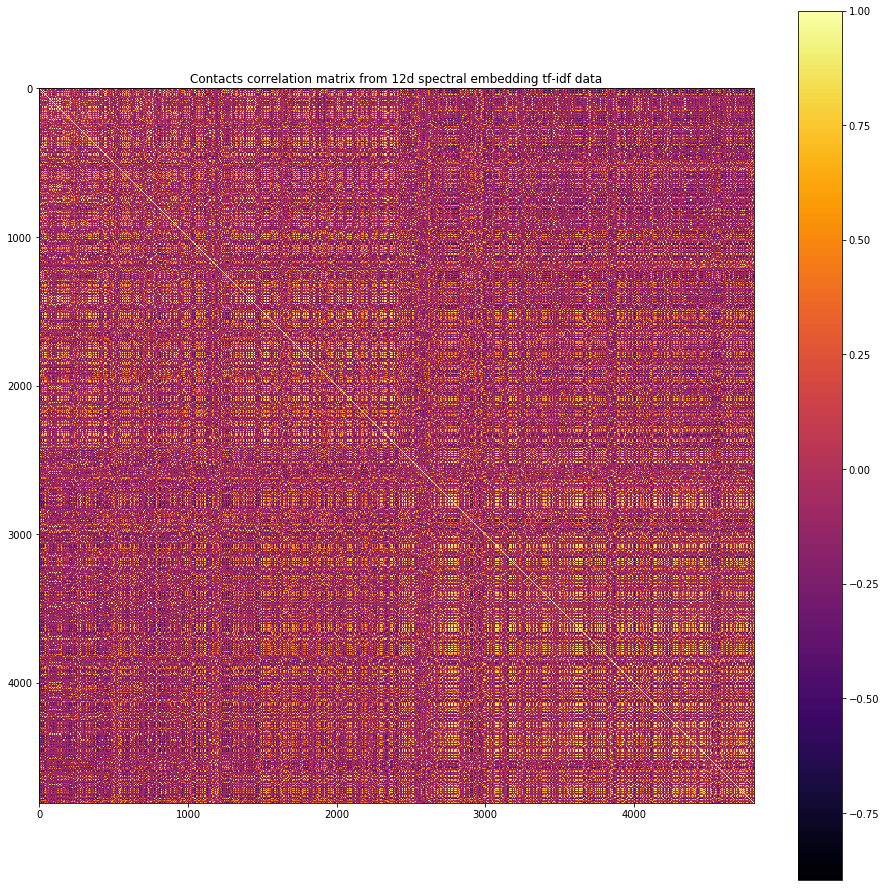

In [27]:
plt.figure(figsize=(16,16))
plt.imshow(np.corrcoef(spect_emb_tfidf_12d), cmap=plt.cm.inferno, interpolation='nearest')
plt.title("Contacts correlation matrix from 12d spectral embedding tf-idf data")
plt.colorbar()
plt.show()

In [28]:
contacts_ward_12d=hierarchy.linkage(spect_emb_tfidf_12d, 'ward')

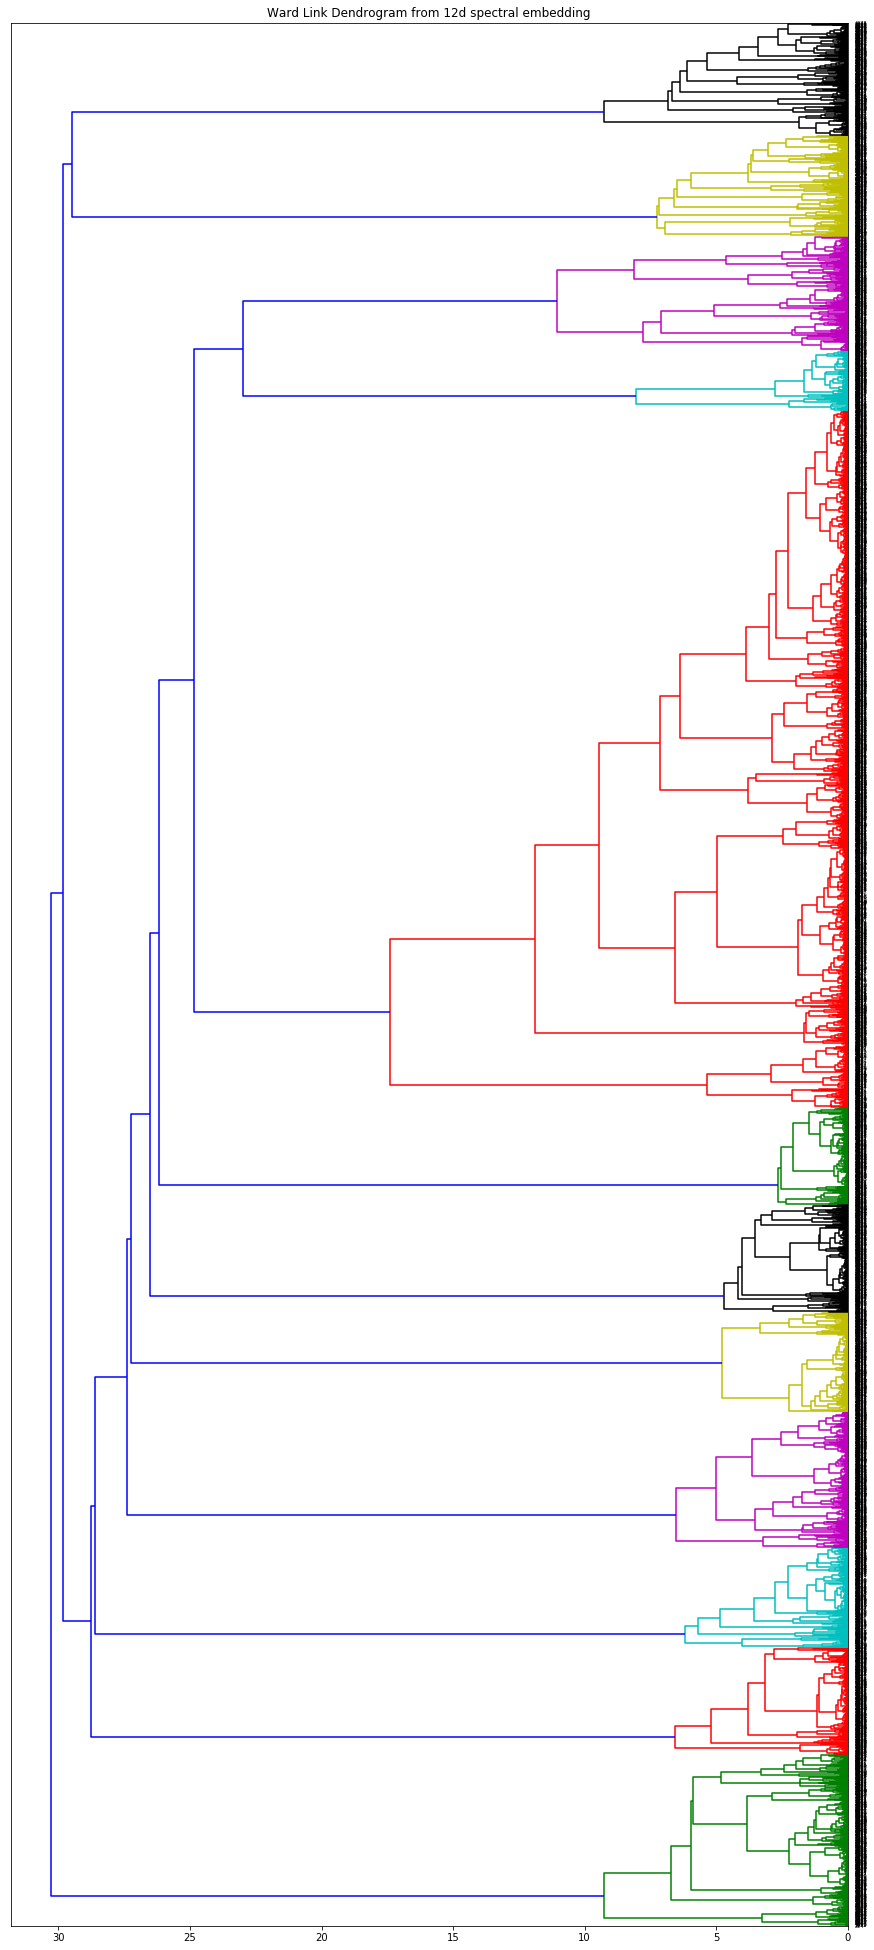

In [29]:
plt.figure(figsize=(15,35))
dn_tf = hierarchy.dendrogram(contacts_ward_12d,orientation="left")
plt.title('Ward Link Dendrogram from 12d spectral embedding')
plt.show()

In [30]:
clustering_12d_ward = AgglomerativeClustering(linkage='ward', n_clusters=8)
clustering_12d_ward.fit(spect_emb_tfidf_12d)
# clustering.fit(n_grams_tfidf.toarray())

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=8,
            pooling_func=<function mean at 0x0000000004E7F510>)

In [31]:
pd.crosstab(index=clustering_12d_ward.labels_, columns="count")

col_0  count
row_0       
0       2719
1        434
2        283
3        254
4        269
5        253
6        343
7        252

In [32]:
clustering_colors=matplotlib.colors.LinearSegmentedColormap.from_list("", ['#d9d9d9','#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','#a65628'])#

Text(0.5,1,'2d spectral coordinates from 12d spectral hierarchical (ward) clustering')

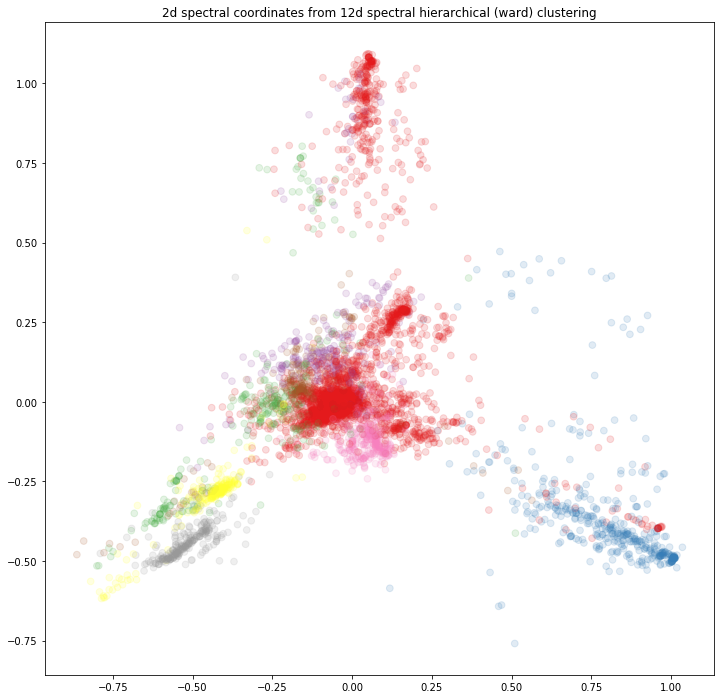

In [33]:
plt.figure(figsize=(12,12))
plt.scatter(spect_emb_tfidf[:,0],spect_emb_tfidf[:,1], alpha=0.15,s=45, c=clustering_12d_ward.labels_, cmap=plt.cm.Set1)
plt.title("2d spectral coordinates from 12d spectral hierarchical (ward) clustering")

In [34]:
dist_mat_12d=pairwise_distances(spect_emb_tfidf_12d)

C:\Users\Alexis\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


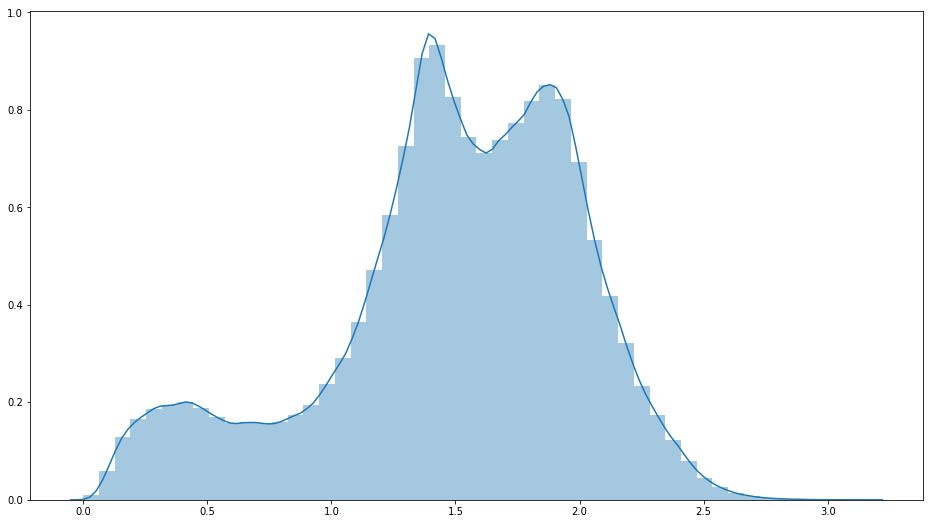

In [35]:
plt.figure(figsize=(16,9))
# plt.hist(n_grams_tfidf_dist_mat.flatten())
sns.distplot(dist_mat_12d.flatten())
# sns.kdeplot()

col_0  count
row_0       
0.00    4869
0.01     206
0.02     426
0.03    1040
0.04    1946
0.05    3290
0.06    5110
0.07    6894
0.08    9472
0.09   12000
0.10   14856
0.11   17600
0.12   20754
0.13   23568
0.14   26004
0.15   28108
0.16   30716
0.17   32586
0.18   33380
0.19   34852
0.20   35996
0.21   37228
0.22   37634
0.23   39076
0.24   40008
0.25   40288
0.26   41156
0.27   42184
0.28   43202
0.29   43498
0.30   44768
0.31   44654
0.32   44328
0.33   44656
0.34   44530
0.35   45106
0.36   44442
0.37   45200
0.38   45168
0.39   45904
0.40   46012
0.41   46932
0.42   46722
0.43   46402
0.44   46100
0.45   45794
0.46   44348
0.47   44210
0.48   43570
0.49   42754


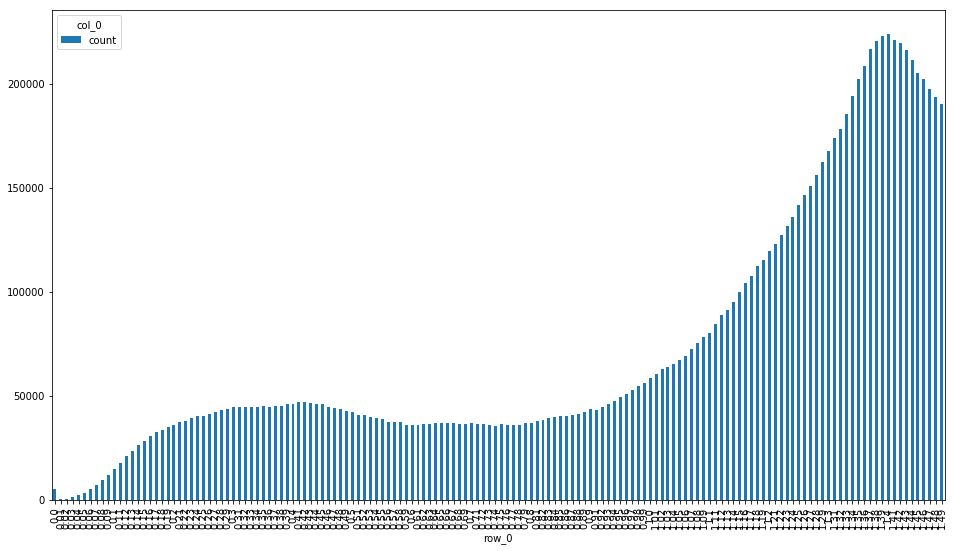

In [36]:
dist_vec=dist_mat_12d.flatten()#/n_grams_tfidf_dist_mat.shape[0]**2
freq_dists=pd.crosstab(index=np.round_(dist_vec,2), columns="count")
print(freq_dists.iloc[:50,:])#.iloc[:50,:])
freq_dists.iloc[:150,:].plot(kind="bar",figsize=(16,9))#.iloc[:150,:]

In [37]:
# db_scan = DBSCAN(eps=.99, min_samples=3).fit(n_grams_tfidf.toarray())
db_scan = DBSCAN(eps=.045, min_samples=50).fit(spect_emb_tfidf)
spect_db_labels = db_scan.labels_

In [38]:
pd.crosstab(index=spect_db_labels, columns="count")

col_0  count
row_0       
-1       853
 0      2805
 1       481
 2        82
 3       132
 4       227
 5       227

array([ 0,  2, -1, ...,  0,  1,  0], dtype=int64)

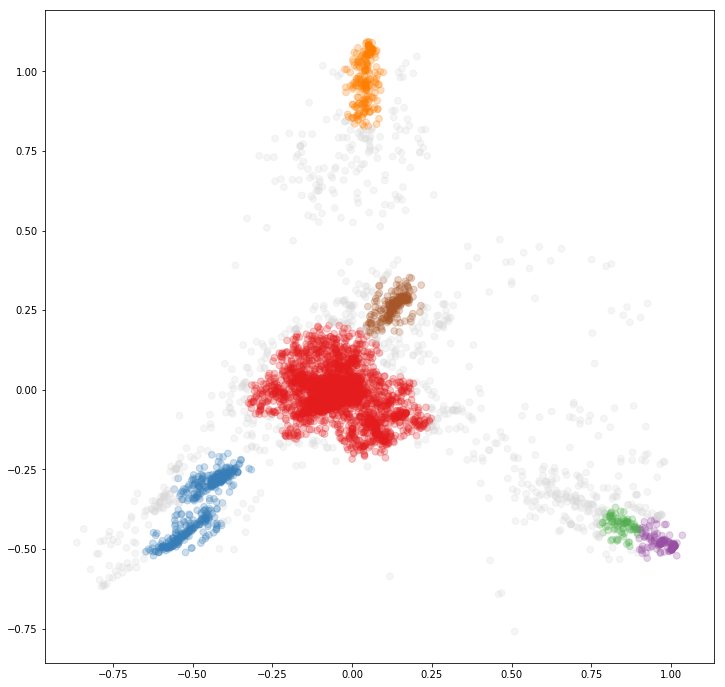

In [39]:
plt.figure(figsize=(12,12))
plt.scatter(spect_emb_tfidf[:,0],spect_emb_tfidf[:,1], alpha=0.25,s=45, c=spect_db_labels, cmap=clustering_colors)#plt.cm.tab10)
spect_db_labels

# Word Cloud

In [40]:
fr_dic={ str(features[i]).upper():txt_freqs[i] for i in indices[:top_n]}
clrs_wrdcld=matplotlib.colors.LinearSegmentedColormap.from_list("", [#'#a50026',
                                                                     '#d73027',
                                                                     '#f46d43',
                                                                     '#fdae61',
#                                                                      '#fee090',
#                                                                      '#ffffbf',
#                                                                      '#e0f3f8',
#                                                                      '#abd9e9',
                                                                     '#74add1',
                                                                     '#4575b4',
                                                                     '#313695'])

In [41]:
pic_wide=900
wc = WordCloud(width=pic_wide,  height=int(pic_wide*(9/21)), 
               background_color=None, mode="RGBA",min_font_size=8,
               colormap=clrs_wrdcld)#plt.cm.Set1_r) #tab10_r)Dark2_r,Paired_r
wc.generate_from_frequencies(fr_dic)

(-0.5, 899.5, 384.5, -0.5)

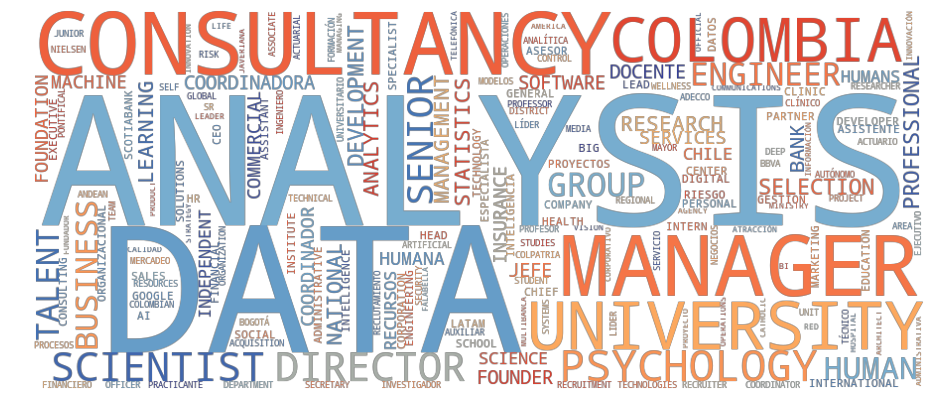

In [42]:
plt.figure(figsize=(16,9))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
#plt.savefig('wrdcld.png')

In [43]:
end_exec=time.time()
print(end_exec-start_exec)

2387.0381186008453
